In [1]:
import tensorflow as tf 
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
from read_data import dataset

<PIL.Image.Image image mode=RGB size=24x48 at 0x7F46B6C3E668>


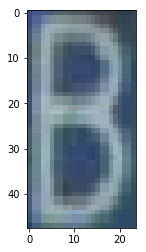

<PIL.Image.Image image mode=YCbCr size=24x48 at 0x7F46B491ED30>


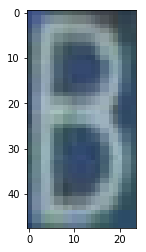

In [2]:
# 色彩空间变化
APhoto = Image.open('data/字母/B/2_1_粤BJ5719.jpg')  # 随便取一张图片打开
APhoto1 = APhoto.resize((24,48))
# 此时mode为RGB，可视化此图片
print(APhoto1)
plt.imshow(APhoto1)
plt.show()
# 转为YUV模式，打印它的mode并可视化
APhoto_ycbcr =APhoto1.convert("YCbCr")
print(APhoto_ycbcr)
plt.imshow(APhoto_ycbcr)
plt.show()

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 13, 12: 0, 13: 0, 14: 32, 15: 24, 16: 0, 17: 31, 18: 27, 19: 0, 20: 0, 21: 9, 22: 21, 23: 0, 24: 25, 25: 2, 26: 24, 27: 0, 28: 19, 29: 0, 30: 25, 31: 21, 32: 27, 33: 0}


/home/aa/targetDirectory/lib/python3.6/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


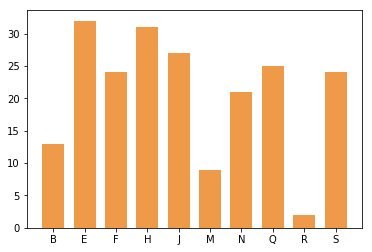

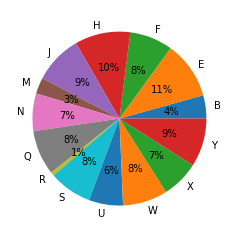

In [4]:
# 随机一个批次的字符数量与比例并利用图表展示(直方图、饼状图)
def show(l_batch, num):
    imgCount = []
    labels = []
    L = {}.fromkeys(range(34), 0)
    L2 = {0:'00',1:'01',2:'02',3:'03',4:'04',5:'05',6:'06',7:'07',8:'08',9:'09',
     10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',18:'J',19:'K',
     20:'L',21:'M',22:'N',23:'P',24:'Q',25:'R',26:'S',27:'T',28:'U',29:'V',
     30:'W',31:'X',32:'Y',33:'Z'}
    with tf.Session() as sess: 
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        coord=tf.train.Coordinator()
        threads= tf.train.start_queue_runners(coord=coord)
        example, l = sess.run([img_batch, l_batch])
        for i in range(num):
            if l[i] in L.keys():
                L[l[i]] += 1
        print(L)
        for k,v in L.items():
            if L[k]:
                imgCount.append(L[k])
                labels.append(L2[k])
        # 直方图
        plt.bar(left=labels,height=imgCount,color='#EE9A49',width=0.7)
        plt.show()
        plt.axes(aspect=1)#使x y轴比例相同
        n = len(labels)
        explode=np.zeros((1,n))
        # 饼图
        plt.pie(x=imgCount,labels=labels,autopct='%.0f%%',explode=explode[0])#autopct显示百分比
        plt.show()
        coord.request_stop()
        coord.join(threads)
    

img_batch, l_batch = dataset('test', 300)
show(l_batch, 300)